<a href="https://colab.research.google.com/github/kamalova/Capstone/blob/main/Dataload_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)

# Data visualization
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
# Seaborn's beautiful styling
import seaborn as sns
sns.set_style('whitegrid')

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
%rm -rf sample_data/

In [3]:
list_dec = pd.read_csv('/content/listings_dec21.csv', compression='gzip', on_bad_lines='skip',
                       low_memory=False);
list_march = pd.read_csv('/content/listings_march.csv', compression='gzip', on_bad_lines='skip',
                       low_memory=False);
list_jun = pd.read_csv('/content/listings_jun.csv', compression='gzip', on_bad_lines='skip',
                       low_memory=False);
list_sep = pd.read_csv('/content/listings_sep.csv', compression='gzip', on_bad_lines='skip',
                       low_memory=False);

In [4]:
print(list_march.shape, list_jun.shape, list_sep.shape, list_dec.shape)

(37631, 74) (37410, 74) (39881, 75) (38277, 74)


In [5]:
df_listings = pd.concat([list_march,list_jun, list_sep,list_dec])

In [6]:
#df_listings.head()

In [7]:
#listings.head()

In [8]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153199 entries, 0 to 38276
Data columns (total 75 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   id                                            153199 non-null  int64  
 1   listing_url                                   153199 non-null  object 
 2   scrape_id                                     153199 non-null  int64  
 3   last_scraped                                  153199 non-null  object 
 4   name                                          153145 non-null  object 
 5   description                                   149268 non-null  object 
 6   neighborhood_overview                         90954 non-null   object 
 7   picture_url                                   153199 non-null  object 
 8   host_id                                       153199 non-null  int64  
 9   host_url                                      153

In [9]:
df_listings = df_listings.drop(columns=['scrape_id','listing_url','last_scraped','source','license',
                                     'calendar_last_scraped','last_review','first_review',
                          'number_of_reviews_ltm','number_of_reviews_l30d',
                          'minimum_minimum_nights','maximum_minimum_nights', 
                          'minimum_maximum_nights','maximum_maximum_nights', 
                          'minimum_nights_avg_ntm','maximum_nights_avg_ntm','host_id','host_since','host_url',
                          'host_listings_count','host_thumbnail_url','host_picture_url','host_verifications','host_location',
                          'host_has_profile_pic', 'host_identity_verified','host_neighbourhood','bathrooms_text', 'bathrooms','reviews_per_month',
                          'calendar_updated','bedrooms'])
                         

In [10]:
df_listings.shape

(153199, 43)

In [11]:
df_listings.columns

Index(['id', 'name', 'description', 'neighborhood_overview', 'picture_url',
       'host_name', 'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'beds', 'amenities',
       'price', 'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated

In [12]:
df_listings.isna().sum()

id                                                  0
name                                               54
description                                      3931
neighborhood_overview                           62245
picture_url                                         0
host_name                                         237
host_about                                      66158
host_response_time                              58270
host_response_rate                              58270
host_acceptance_rate                            52551
host_is_superhost                                 216
host_total_listings_count                         237
neighbourhood                                   62241
neighbourhood_cleansed                              0
neighbourhood_group_cleansed                        0
latitude                                            0
longitude                                           0
property_type                                       0
room_type                   

In [13]:
df_listings.dropna(subset=['name', 'description', 'neighborhood_overview', 
       'host_name', 'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'neighbourhood',
        'beds','review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication','review_scores_location', 'review_scores_value'], inplace=True) #droping null's in reviews

In [14]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31538 entries, 0 to 37873
Data columns (total 43 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            31538 non-null  int64  
 1   name                                          31538 non-null  object 
 2   description                                   31538 non-null  object 
 3   neighborhood_overview                         31538 non-null  object 
 4   picture_url                                   31538 non-null  object 
 5   host_name                                     31538 non-null  object 
 6   host_about                                    31538 non-null  object 
 7   host_response_time                            31538 non-null  object 
 8   host_response_rate                            31538 non-null  object 
 9   host_acceptance_rate                          31538 non-null 

In [15]:
df_listings.shape

(31538, 43)

# EDA Host Types

In [16]:
df_listings.host_is_superhost.value_counts()

f    18568
t    12970
Name: host_is_superhost, dtype: int64

In [17]:
df_listings['host_is_superhost'].replace('t','SuperHost',inplace = True) 
df_listings['host_is_superhost'].replace('f','RegularHost',inplace =True)

Text(0.5, 1.0, 'NYC Airbnb Grouped Neighbourhoods by Host Type')

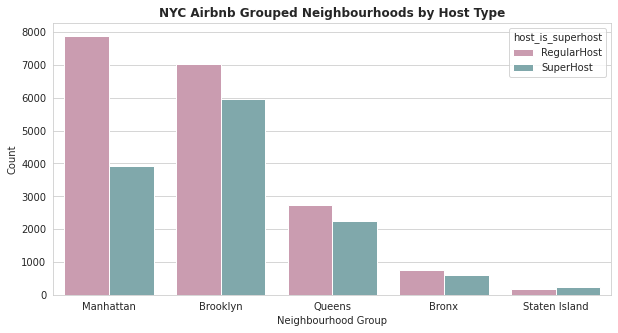

In [18]:
ax = sns.countplot(df_listings['neighbourhood_group_cleansed'], hue=df_listings.host_is_superhost, palette=['#D294AF',"#79AEB2"])
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_xlabel('Neighbourhood Group')
ax.set_ylabel('Count');
plt.title('NYC Airbnb Grouped Neighbourhoods by Host Type',fontweight="bold")

In [19]:
df_listings['host_response_rate'] = df_listings['host_response_rate'].str.rstrip('%').astype('float') / 100.0
df_listings['host_acceptance_rate'] = df_listings['host_acceptance_rate'].str.rstrip('%').astype('float') / 100.0


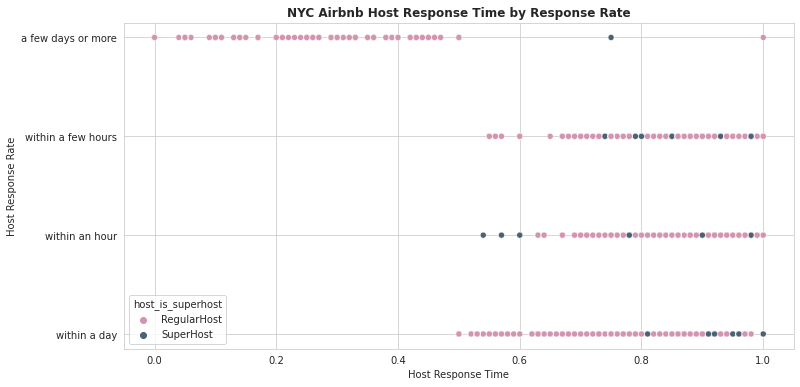

In [20]:
plt.figure(figsize=(12,6))
sns.scatterplot(df_listings.host_response_rate,df_listings.host_response_time,hue=df_listings.host_is_superhost, palette=['#D294AF',"#4A6274"])
plt.ioff()
plt.title('NYC Airbnb Host Response Time by Response Rate',fontweight="bold")
plt.xlabel('Host Response Time')
plt.ylabel('Host Response Rate');

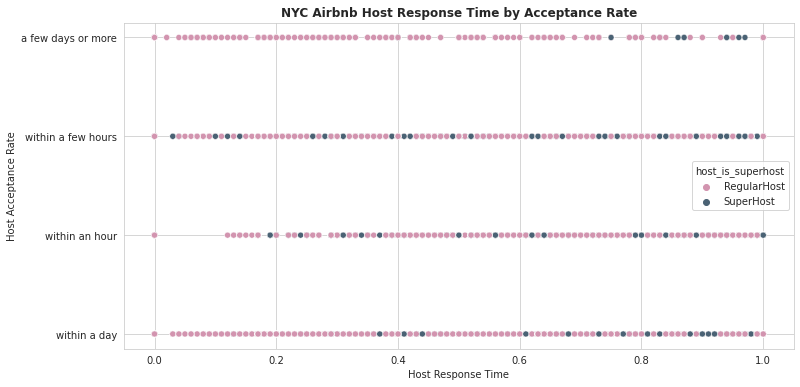

In [21]:
plt.figure(figsize=(12,6))
sns.scatterplot(df_listings.host_acceptance_rate,df_listings.host_response_time,hue=df_listings.host_is_superhost, palette=['#D294AF',"#4A6274"])
plt.ioff()
plt.title('NYC Airbnb Host Response Time by Acceptance Rate',fontweight="bold")
plt.xlabel('Host Response Time')
plt.ylabel('Host Acceptance Rate');

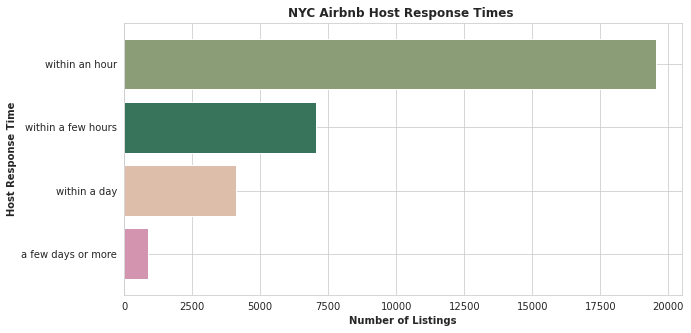

In [22]:
feq = df_listings['host_response_time'].value_counts().sort_index()
feq.plot.barh(figsize=(10,5), width=0.8, rot=0, color=['#D294AF', '#DDBEAA','#37745B','#8B9D77'])
plt.title('NYC Airbnb Host Response Times ', fontweight="bold")
plt.xlabel('Number of Listings', fontweight="bold")
plt.ylabel('Host Response Time', fontweight="bold")
plt.show()

In [23]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31538 entries, 0 to 37873
Data columns (total 43 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            31538 non-null  int64  
 1   name                                          31538 non-null  object 
 2   description                                   31538 non-null  object 
 3   neighborhood_overview                         31538 non-null  object 
 4   picture_url                                   31538 non-null  object 
 5   host_name                                     31538 non-null  object 
 6   host_about                                    31538 non-null  object 
 7   host_response_time                            31538 non-null  object 
 8   host_response_rate                            31538 non-null  float64
 9   host_acceptance_rate                          31538 non-null 

In [24]:
df_listings.price.dtype

dtype('O')

In [25]:
df_listings['price'] = df_listings['price'].str.replace('$','')
df_listings['price'] = df_listings['price'].str.replace(',','').astype('float64')

In [26]:
df_listings.dropna(subset=['host_about'], inplace=True)

In [27]:
df_listings['host_about']

0                                                                                                                                                                                                   A New Yorker since 2000! My passion is creating beautiful, unique spaces where unforgettable memories are made. It's my pleasure to host people from around the world and meet new faces. Welcome travelers! \r\n\r\nI am a Sound Therapy Practitioner and Kundalini Yoga & Meditation teacher. I work with energy and sound for relaxation and healing, using Symphonic gong, singing bowls, tuning forks, drums, voice and other instruments.
3                                                                                                                                                                                                                                                                                                                                                                                   

In [28]:
df_listings =  df_listings[df_listings["host_about"].str.contains("hidden")==False]

In [29]:
df_listings['host_about']

0                                                                                                                                                                                                   A New Yorker since 2000! My passion is creating beautiful, unique spaces where unforgettable memories are made. It's my pleasure to host people from around the world and meet new faces. Welcome travelers! \r\n\r\nI am a Sound Therapy Practitioner and Kundalini Yoga & Meditation teacher. I work with energy and sound for relaxation and healing, using Symphonic gong, singing bowls, tuning forks, drums, voice and other instruments.
3                                                                                                                                                                                                                                                                                                                                                                                   

In [30]:
import string
string.punctuation
import re

# Preprocessing Texts
def clean_text(text):
    '''
    input- 'text' to be preprocessed
    output- converts input 'text' to lowercase,remove square brackets,links,punctuation 
    and words containing numbers. Removes common accent characters and returns clean text. 
    '''
    text= re.sub('[0-9\n]',' ',text)
    text = text.lower()
    text = re.sub('',"", text)
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text) # removes punctuations
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('\w*\d\w*', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) 
    #text = re.sub('[^a-zA-Z]', '', str(text))
    return text

In [31]:
#removing punctions
df_listings['host_about'] = df_listings['host_about'].apply(lambda x: clean_text(x))
df_listings['host_about']

0                                                                                                                                                                                           a new yorker since       my passion is creating beautiful  unique spaces where unforgettable memories are made  it s my pleasure to host people from around the world and meet new faces  welcome travelers      i am a sound therapy practitioner and kundalini yoga   meditation teacher  i work with energy and sound for relaxation and healing  using symphonic gong  singing bowls  tuning forks  drums  voice and other instruments 
3                                                                                                                                                                                                                                                                                                                                                                                               

In [32]:
# Frunction to remove single characters within the text
def single_char(text):
  text = re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)', '',text)
  return text;


In [33]:
df_listings['host_about'] = df_listings['host_about'].apply(lambda x: single_char(x))
df_listings['host_about']

0                                                                                                                                                                               new yorker since       my passion is creating beautiful  unique spaces where unforgettable memories are made  it my pleasure to host people from around the world and meet new faces  welcome travelers      am sound therapy practitioner and kundalini yoga   meditation teacher  work with energy and sound for relaxation and healing  using symphonic gong  singing bowls  tuning forks  drums  voice and other instruments 
3                                                                                                                                                                                                                                                                                                                                                                                                                     

In [34]:
df_listings.host_is_superhost.value_counts()

RegularHost    18076
SuperHost      12573
Name: host_is_superhost, dtype: int64

In [35]:
#!pip install nltk

In [36]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [37]:
from nltk.corpus import stopwords

In [38]:
superhost = df_listings[df_listings['host_is_superhost'].str.contains('SuperHost')==True]# superhost about dataframe
regulhost = df_listings[df_listings['host_is_superhost'].str.contains('RegularHost')==True] # regularhost about dataframe


In [39]:
superhost.host_is_superhost

5        SuperHost
8        SuperHost
10       SuperHost
12       SuperHost
17       SuperHost
           ...    
37287    SuperHost
37294    SuperHost
37306    SuperHost
37311    SuperHost
37454    SuperHost
Name: host_is_superhost, Length: 12573, dtype: object

In [40]:
stop_words = set(stopwords.words("english")) # setting stop words

In [41]:
# assigning word cloud 
wordcloud = WordCloud(background_color='black', stopwords = stop_words,max_words = 500,
                    max_font_size = 100, random_state = 42, width=800, height=400,colormap='Set1')

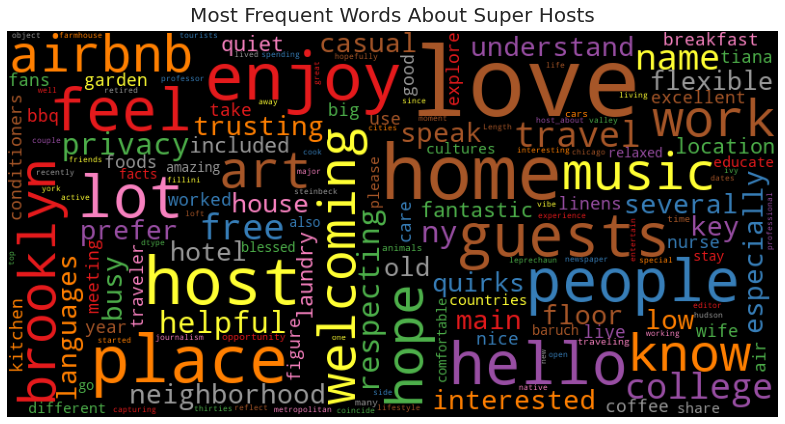

In [42]:
# Display about SuperHOst
wordcloud.generate(str(superhost['host_about']))
plt.figure(figsize=(12,6))
plt.imshow(wordcloud);
plt.title(f"Most Frequent Words About Super Hosts", fontdict={'size': 20, 
                                                        'verticalalignment': 'bottom'})
plt.axis('off');
plt.tight_layout()  

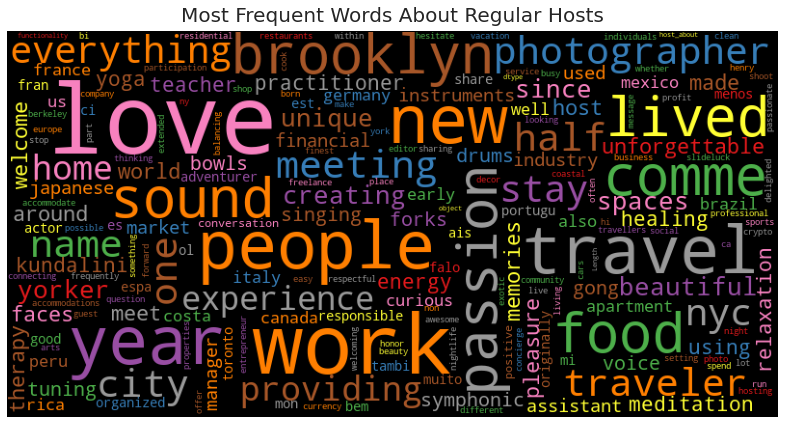

In [43]:
# Display about SuperHOst
wordcloud.generate(str(regulhost['host_about']))
plt.figure(figsize=(12,6))
plt.imshow(wordcloud);
plt.title(f"Most Frequent Words About Regular Hosts", fontdict={'size': 20, 
                                                        'verticalalignment': 'bottom'})
plt.axis('off');
plt.tight_layout()  

In [44]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30649 entries, 0 to 37873
Data columns (total 43 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            30649 non-null  int64  
 1   name                                          30649 non-null  object 
 2   description                                   30649 non-null  object 
 3   neighborhood_overview                         30649 non-null  object 
 4   picture_url                                   30649 non-null  object 
 5   host_name                                     30649 non-null  object 
 6   host_about                                    30649 non-null  object 
 7   host_response_time                            30649 non-null  object 
 8   host_response_rate                            30649 non-null  float64
 9   host_acceptance_rate                          30649 non-null 

#### EDA Neighbourhoods

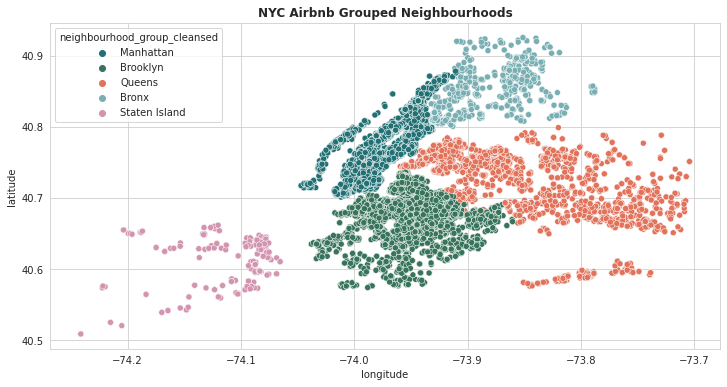

In [45]:
plt.figure(figsize=(12,6))
sns.scatterplot(df_listings.longitude,df_listings.latitude,hue=df_listings.neighbourhood_group_cleansed, 
                palette=['#217074','#37745B','#E2725A',"#79AEB2", '#D294AF'])
plt.ioff()
plt.title('NYC Airbnb Grouped Neighbourhoods',fontweight="bold")
plt.show();

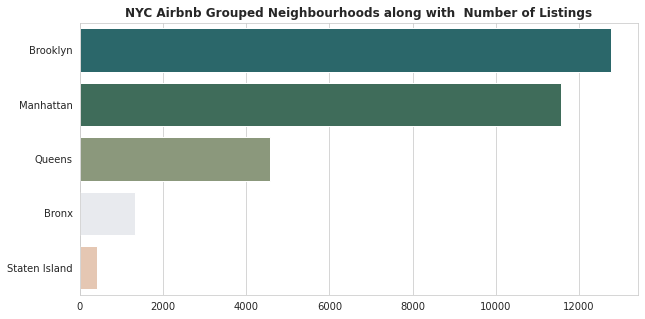

In [46]:
# Which neighborhood has the highest number of listings?
plt.figure(figsize=(10,5))
sns.barplot(y = df_listings['neighbourhood_group_cleansed'].value_counts().sort_values(ascending=False).keys(),
        x = df_listings['neighbourhood_group_cleansed'].value_counts().sort_values(ascending=False).values, 
        orient='h', palette=['#217074','#37745B','#8B9D77','#E7EAEF','#EDC5AB']);
plt.title('NYC Airbnb Grouped Neighbourhoods along with  Number of Listings',fontweight="bold")
ax.set_xlabel('Number of Listings')
ax.set_ylabel('Neighborhoods Group');


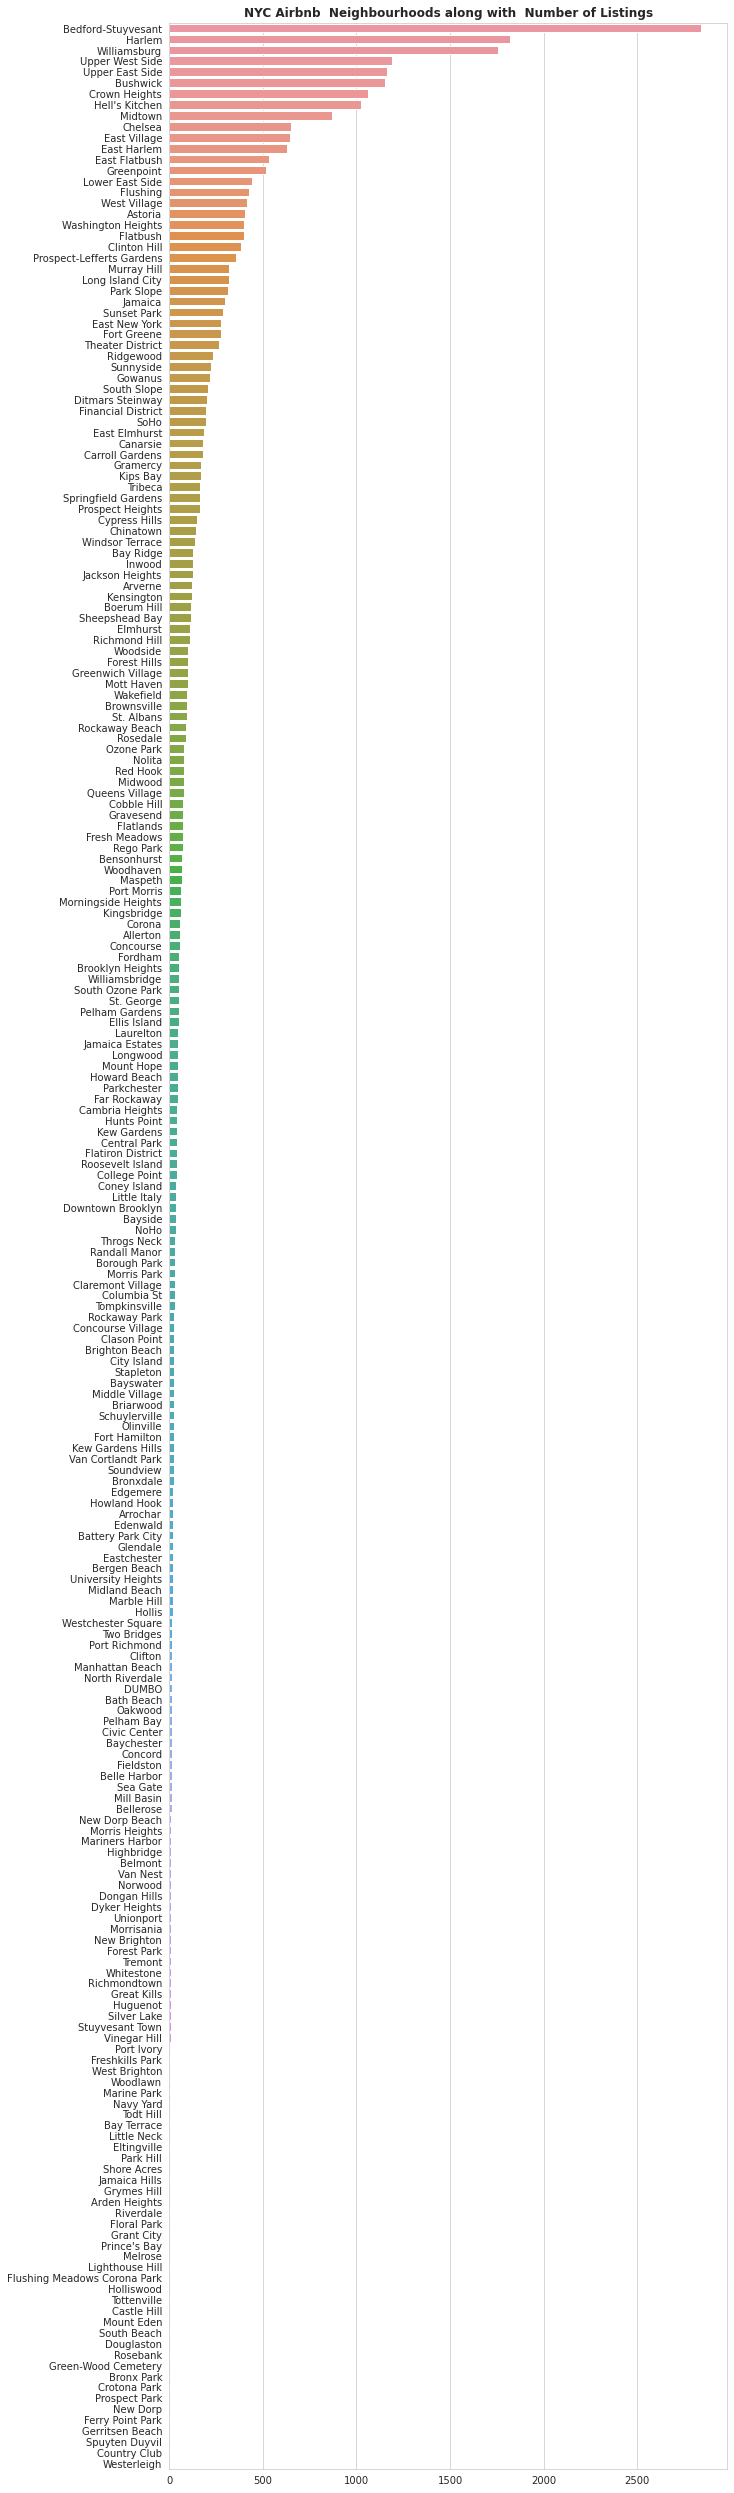

In [47]:
# Which neighborhood has the highest number of listings?
plt.figure(figsize=(10,45))
sns.barplot(y = df_listings['neighbourhood_cleansed'].value_counts().sort_values(ascending=False).keys(),
        x = df_listings['neighbourhood_cleansed'].value_counts().sort_values(ascending=False).values, 
        orient='h');
plt.title('NYC Airbnb  Neighbourhoods along with  Number of Listings',fontweight="bold")
ax.set_xlabel('Number of Listings')
ax.set_ylabel('NYC Neighborhoods');


In [48]:
df_listings = df_listings.reset_index()


In [51]:
# Average price per neighborhood
price_per_neighb = df_listings.groupby(['neighbourhood_group_cleansed'])['price'].mean()
price_per_neighb = price_per_neighb.reset_index()

In [50]:
import plotly.express as px
fig = px.scatter_mapbox(data_frame=df_listings,
                      lat="latitude",
                      lon="longitude",
                      color="price",
                      hover_data=["price"],
                      hover_name="neighbourhood_group_cleansed",
                      height=500,
                      width=800,
                      size="price",);

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":1,"l":0,"b":0})
# Distribution of the prices by location
fig.show();

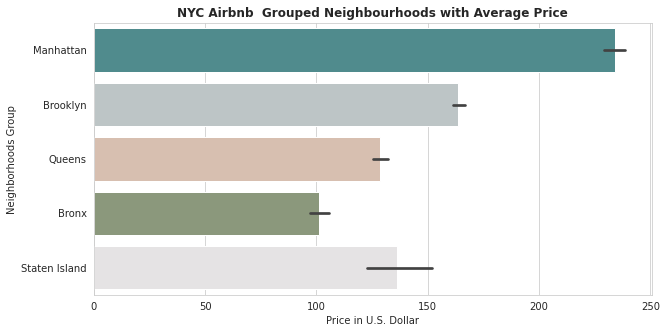

In [52]:
# Neighborhoods with their average price 
plt.figure(figsize=(10,5))
ax = sns.barplot(y = df_listings['neighbourhood_group_cleansed'], x = df_listings['price'],
                 data = price_per_neighb, orient='h', palette=['#469597','#BBC6C8','#DDBEAA','#8B9D77','#E5E3E4'])
plt.title('NYC Airbnb  Grouped Neighbourhoods with Average Price',fontweight="bold")
ax.set_xlabel('Price in U.S. Dollar')
ax.set_ylabel('Neighborhoods Group');


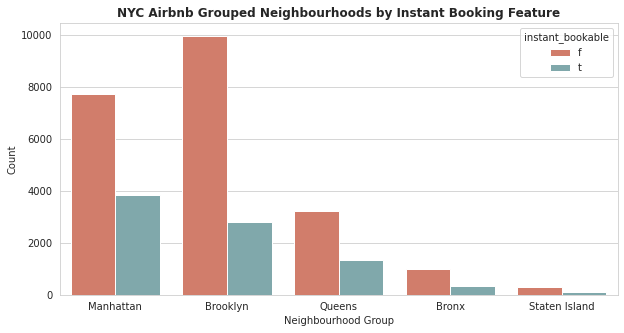

In [53]:
ax = sns.countplot(df_listings['neighbourhood_group_cleansed'], hue=df_listings.instant_bookable, palette=['#E2725A',"#79AEB2"])
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.title('NYC Airbnb Grouped Neighbourhoods by Instant Booking Feature',fontweight="bold")
ax.set_xlabel('Neighbourhood Group')
ax.set_ylabel('Count');


#### Property Types

In [54]:
#Unique Check
df_listings.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [55]:
import matplotlib.ticker as mtick

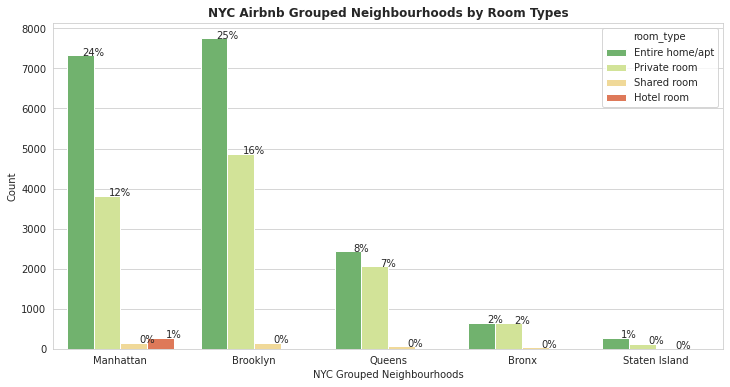

In [56]:
ax = sns.countplot(df_listings['neighbourhood_group_cleansed'], hue=df_listings.room_type, palette='RdYlGn_r')
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.title('NYC Airbnb Grouped Neighbourhoods by Room Types',fontweight="bold")
ax.set_xlabel('NYC Grouped Neighbourhoods')
ax.set_ylabel('Count');


# Print the percentage on the bars
total = float(len(df_listings))
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

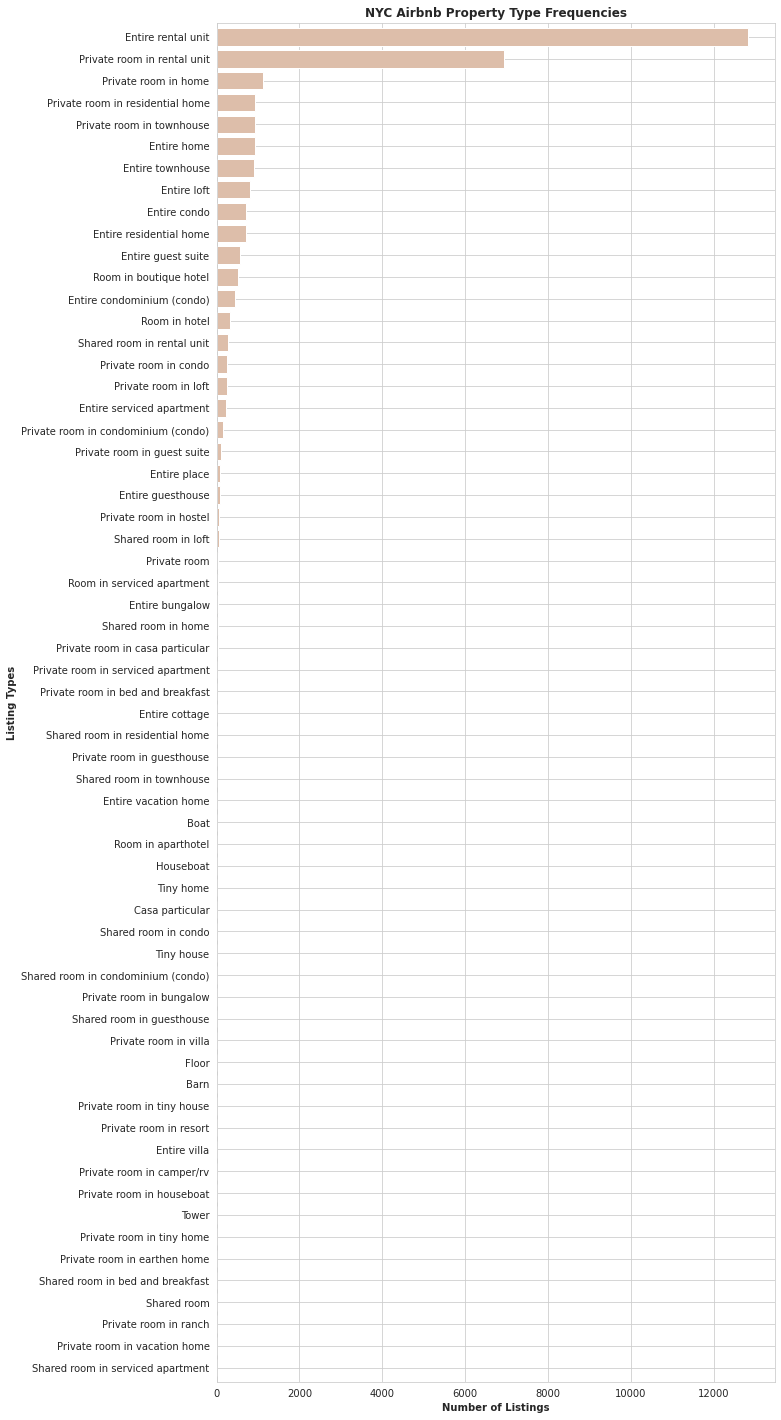

In [57]:
freq_ptype = df_listings['property_type'].value_counts().sort_values(ascending=True)
freq_ptype.plot.barh(figsize =(10,25),width=0.8, color='#DDBEAA')
plt.title('NYC Airbnb Property Type Frequencies',fontweight="bold")
plt.xlabel('Number of Listings', fontweight="bold")
plt.ylabel('Listing Types', fontweight="bold");
plt.show();

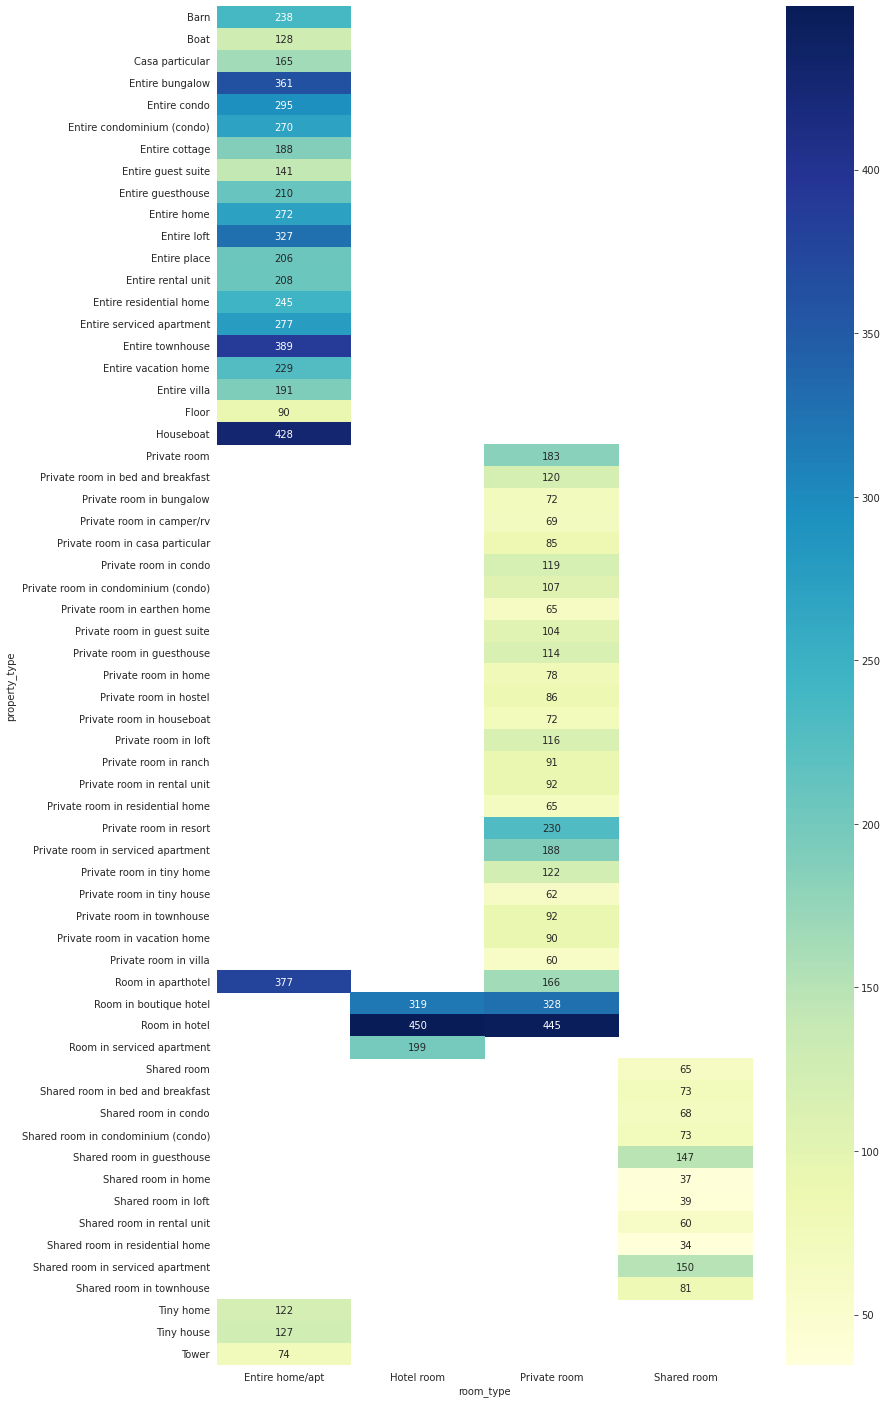

In [58]:

plt.figure(figsize=(12,25))
sns.heatmap(df_listings.groupby([
        'property_type', 'room_type']).price.mean().unstack(),annot=True, fmt=".0f", cmap="YlGnBu")

This chart allows us to see all the listings' prices broken down by Property type and Room type. This gives us a much better understanding of the price breakdown in Seattle based on Property and Room types. It can be analyzed that for almost all Property types, prices for Entire Home/Apartment is the maximum. This tells us that Property type and Room type plays a very important role in deciding price of a listing. Lets see how the number of bedrooms available affects the price of a listing

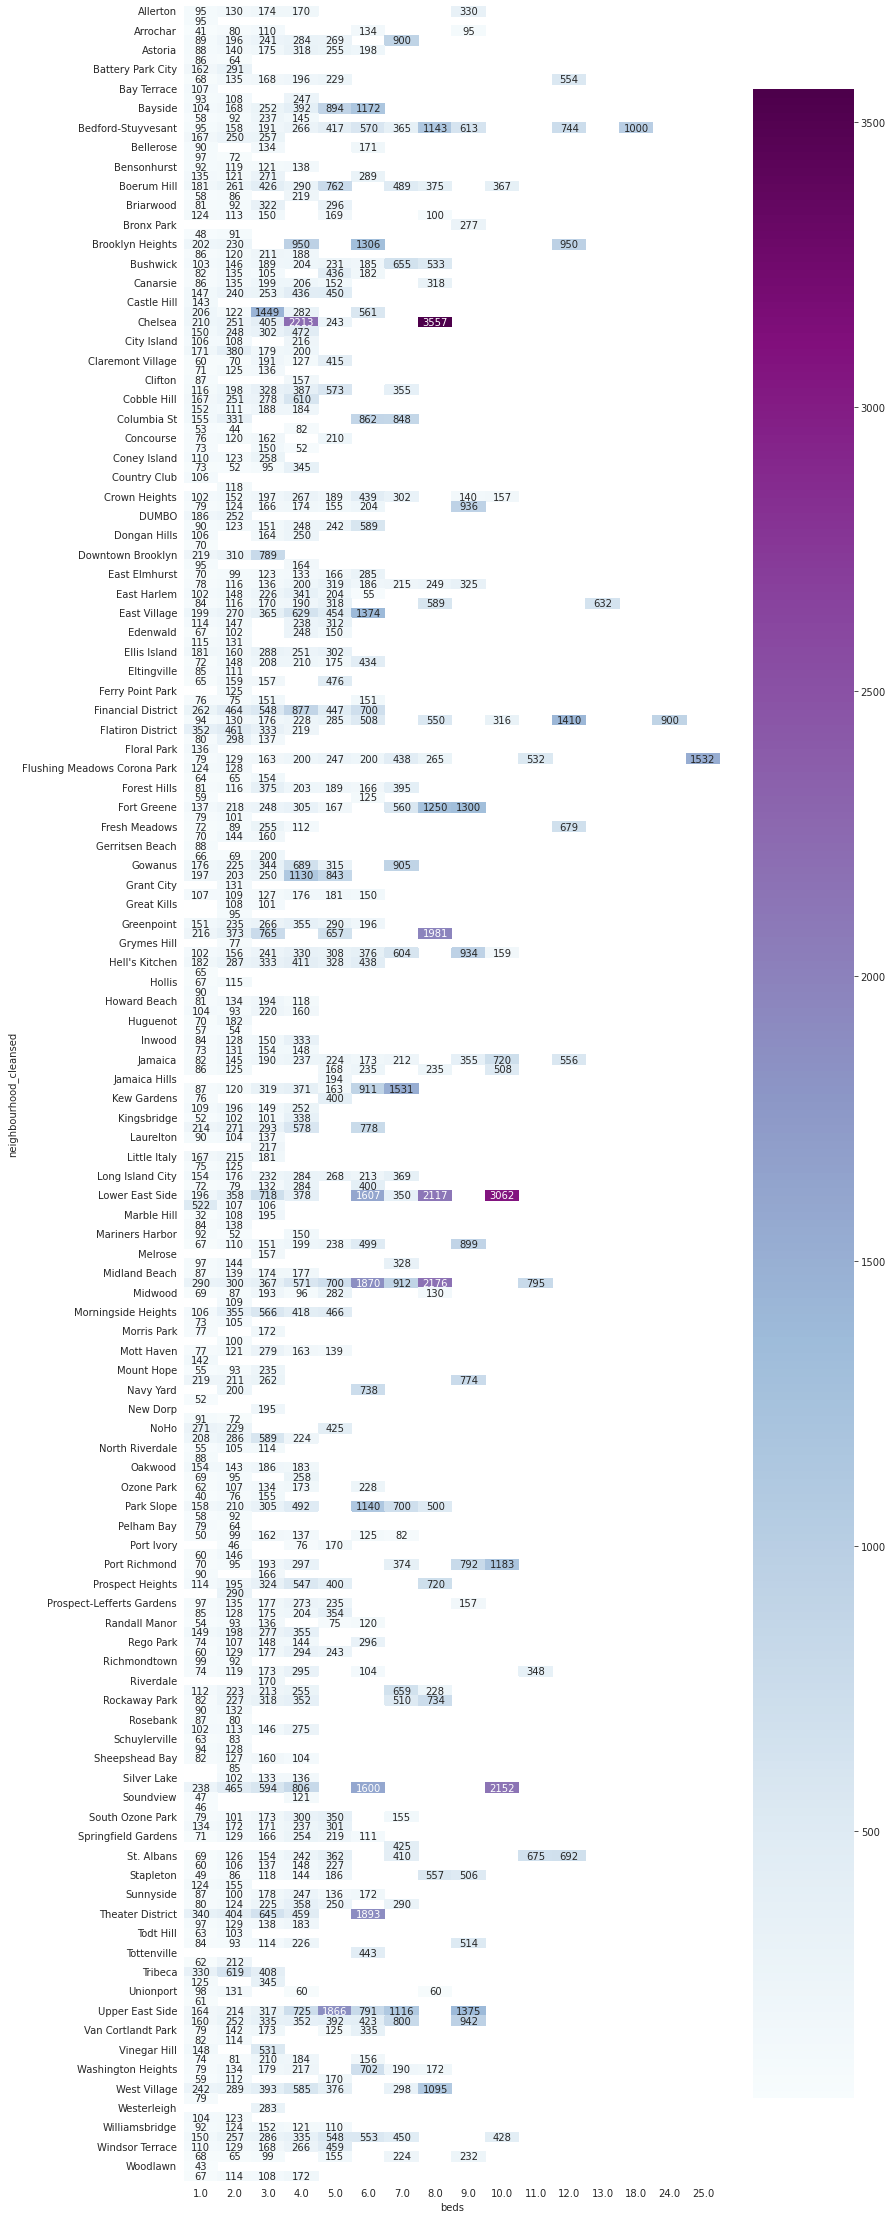

In [59]:

# HeatMap for variation of prices with number of bedrooms for listings

plt.figure(figsize=(12,40))
sns.heatmap(df_listings.groupby([
        'neighbourhood_cleansed', 'beds']).price.mean().unstack(),annot=True, fmt=".0f",cmap="BuPu")

In [60]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [61]:
nltk.download('wordnet')
  

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [62]:
 nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [63]:
#Analyzing what amenities costs more

amenities = df_listings[['amenities','price','id',]]
amenities_top = amenities.sort_values('price',ascending=[0])
amenities_top=amenities_top.head(30)
allemenities = ''
for index,row in amenities_top.iterrows():
    p = re.sub('[^a-zA-Z]+',' ', row['amenities'])
    allemenities+=p

all_amenities_df=nltk.word_tokenize(allemenities)
filtered_data=[word for word in all_amenities_df if word not in stopwords.words('english')] 
wnl = nltk.WordNetLemmatizer() 
allemenities_data=[wnl.lemmatize(data) for data in filtered_data]
allemenities_words=' '.join(all_amenities_df)

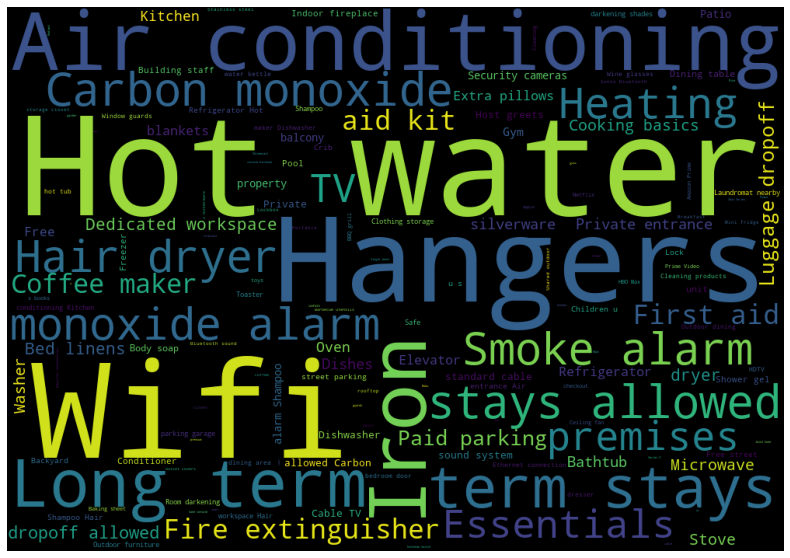

In [64]:
wordcloud = WordCloud(width = 1000, height = 700).generate(allemenities_words)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

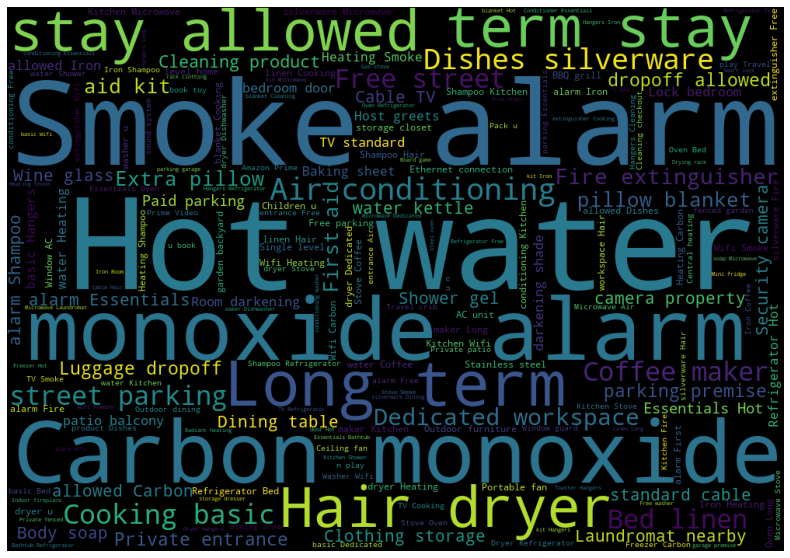

In [65]:
amenities_bott = df_listings.sort_values('price',ascending=[1])
amenities_Fbott=amenities_bott.head(30)

allemenities_bott = ''
for index,row in amenities_bott.iterrows():
    p = re.sub('[^a-zA-Z]+',' ', row['amenities'])
    allemenities_bott+=p

allemenities_df_bott=nltk.word_tokenize(allemenities_bott)
filtered_datab=[word for word in allemenities_df_bott if word not in stopwords.words('english')] 
wnl = nltk.WordNetLemmatizer() 
allemenities_df_bott=[wnl.lemmatize(data) for data in filtered_datab]
allemenities_wordsb=' '.join(allemenities_df_bott)


wordcloud = WordCloud(width = 1000, height = 700).generate(allemenities_wordsb)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

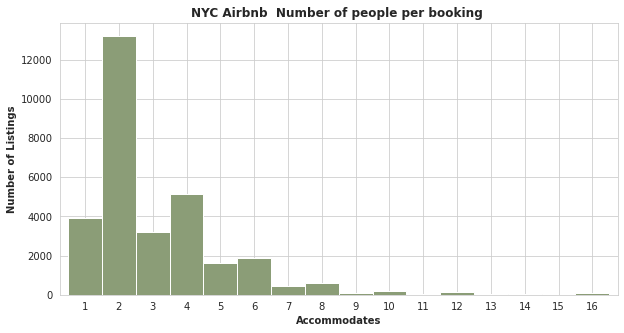

In [66]:
feq = df_listings['accommodates'].value_counts().sort_index()
feq.plot.bar(figsize=(10,5), width=1, rot=0, color='#8B9D77')
plt.title('NYC Airbnb  Number of people per booking ', fontweight="bold")
plt.ylabel('Number of Listings', fontweight="bold")
plt.xlabel('Accommodates', fontweight="bold")
plt.show()

In [67]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30649 entries, 0 to 30648
Data columns (total 44 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   index                                         30649 non-null  int64  
 1   id                                            30649 non-null  int64  
 2   name                                          30649 non-null  object 
 3   description                                   30649 non-null  object 
 4   neighborhood_overview                         30649 non-null  object 
 5   picture_url                                   30649 non-null  object 
 6   host_name                                     30649 non-null  object 
 7   host_about                                    30649 non-null  object 
 8   host_response_time                            30649 non-null  object 
 9   host_response_rate                            30649 non-null 